# Machine Learning: Unit End Project
## Creating Cohorts of Songs

**Name:** Alexander Ruiz

## Project Overview
This project analyzes Spotify audio features of Rolling Stones songs to group similar songs into cohorts. Exploratory data analysis and clustering techniques were used to understand song patterns and support music recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rolling_stones_spotify.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1610, 18)


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


**Note:** The dataset was successfully loaded and contains 1,610 songs with 18 features. Each row represents a Rolling Stones song along with its Spotify audio characteristics.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [4]:
df.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [5]:
#drop index column
df = df.drop(columns=["Unnamed: 0"])
#duplicate song IDs
df["id"].duplicated().sum()

0

**Note:** No missing values were found in the dataset. The Unnamed: 0 column was removed as it did not provide meaningful information. Each song was verified to have a unique Spotify ID, confirming no duplicate entries.

In [6]:
#extract release year
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
#convert duration to minutes
df["duration_min"] = df["duration_ms"] / 60000
df[["release_date", "release_year", "duration_ms", "duration_min"]].head()

,release_date,release_year,duration_ms,duration_min
0,2022-06-10,2022,48640,0.810667
1,2022-06-10,2022,253173,4.219550
2,2022-06-10,2022,263160,4.386000
3,2022-06-10,2022,305880,5.098000
4,2022-06-10,2022,305106,5.085100


**Note:** The release year was extracted from the release date to enable time-based analysis. Song duration was converted from milliseconds to minutes to make it easier to interpret and analyze.

In [7]:
#allbums most popular songs
popular_threshold = 60

album_popularity = (
    df[df["popularity"] >= popular_threshold]
    .groupby("album")["name"]
    .count()
    .sort_values(ascending=False)
)
album_popularity.head(10)

album
Sticky Fingers (Remastered)                   3
Aftermath                                     2
Let It Bleed                                  2
Some Girls                                    2
Beggars Banquet (50th Anniversary Edition)    1
Between The Buttons                           1
Bridges To Babylon (Remastered)               1
Exile On Main Street (2010 Re-Mastered)       1
Goats Head Soup (Remastered 2009)             1
Out Of Our Heads                              1
Name: name, dtype: int64

**Note:** Albums were ranked based on the number of popular songs they contain. Sticky Fingers (Remastered) and Aftermath were identified as the top albums, making them strong recommendations for new listeners.

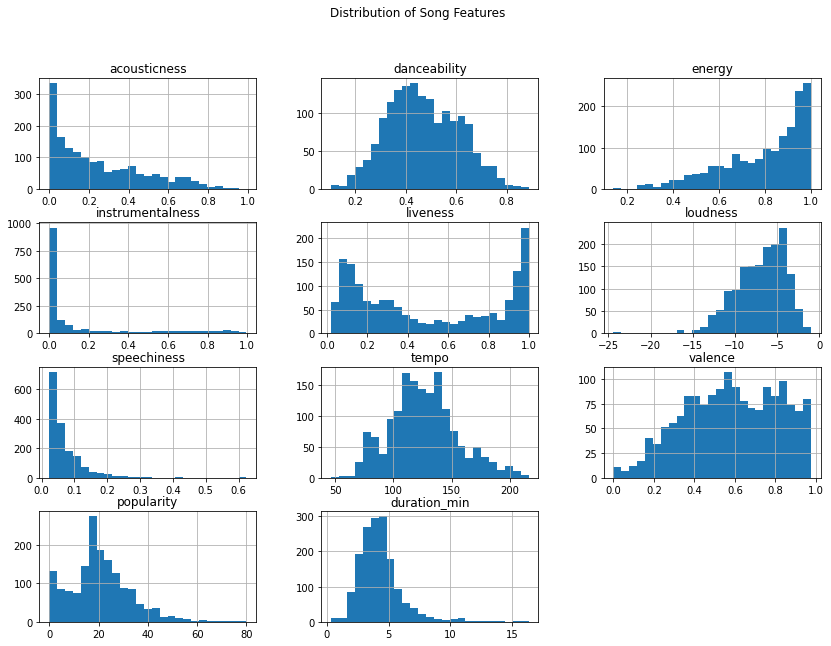

In [8]:
#audio featuress
audio_features = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo",
    "valence", "popularity", "duration_min"
]
df[audio_features].hist(bins=25, figsize=(14, 10))
plt.suptitle("Distribution of Song Features")
plt.show()

**Note:** The songs generally show high energy levels, consistent with rock music. Most tracks are vocal-focused, and only a small number achieve very high poppularity.

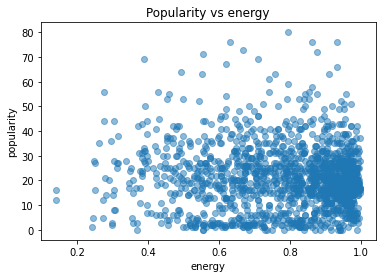

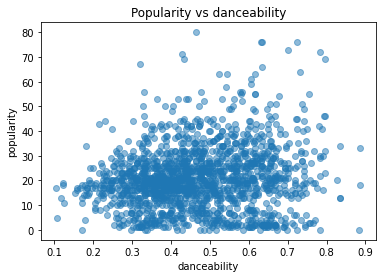

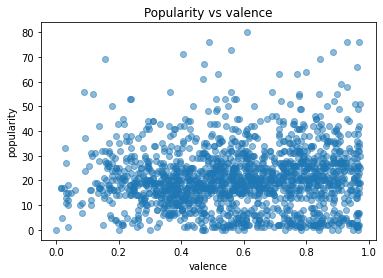

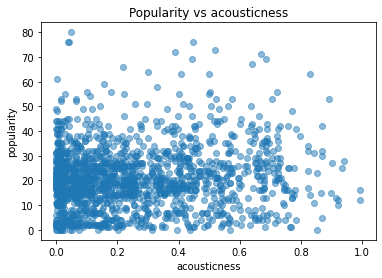

In [9]:
#popularity and song features
features = ["energy", "danceability", "valence", "acousticness"]
for feature in features:
    plt.scatter(df[feature], df["popularity"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("popularity")
    plt.title(f"Popularity vs {feature}")
    plt.show()

**Note:** Popularity is weakly related to individual features, suggesting it is influenced by multiple song characteristiccs.

In [10]:
#drop rows withouut release year
df_time = df.dropna(subset=["release_year"]).copy()
#decade column
df_time["decade"] = (df_time["release_year"] // 10) * 10
#features to compare with popularity
features = ["energy", "danceability", "valence", "acousticness"]
corr_data = []
for decade in sorted(df_time["decade"].unique()):
    temp = df_time[df_time["decade"] == decade]
    if len(temp) > 10:  # ensure enough songs
        row = {"decade": decade}
        for f in features:
            row[f] = temp["popularity"].corr(temp[f])
        corr_data.append(row)
corr_df = pd.DataFrame(corr_data)
corr_df

,decade,energy,danceability,valence,acousticness
0,1960,-0.066106,0.015859,-0.044037,0.150354
1,1970,-0.081240,0.213831,0.023736,0.183585
2,1980,0.050892,0.239104,0.130811,-0.154576
3,1990,-0.125825,0.096135,-0.122679,-0.082096
4,2000,-0.161320,0.314479,0.119825,-0.095916
5,2010,-0.016631,0.151452,0.105186,-0.001473
6,2020,-0.209049,0.137185,0.120102,-0.008170


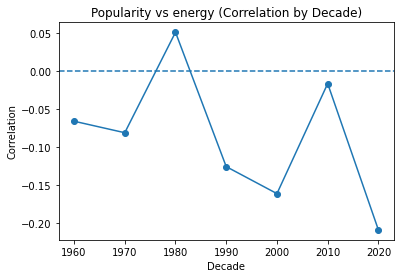

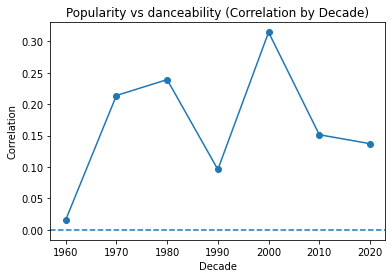

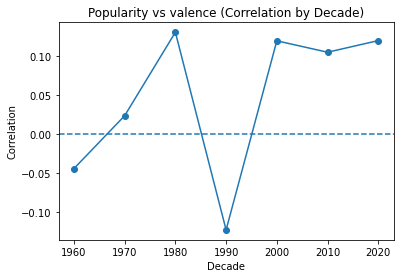

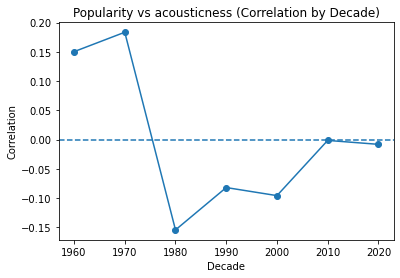

In [11]:
#correlation trendss
for f in features:
    plt.plot(corr_df["decade"], corr_df[f], marker="o")
    plt.title(f"Popularity vs {f} (Correlation by Decade)")
    plt.xlabel("Decade")
    plt.ylabel("Correlation")
    plt.axhline(0, linestyle="--")
    plt.show()

**Note:** The relationship between popularity and song features changes across decades. Danceability remains positively related to popularity in later decades, while other features vary, showing evolving musical preferences.

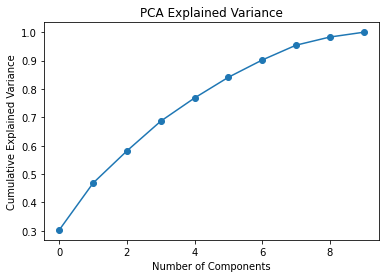

In [12]:
#reduction using PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#featuress for clusttering
cluster_features = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo",
    "valence", "duration_min"
]
X = df[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
#plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

**Note:** The PCA explained variance plot shows that about 5–6 components capture most of the dataset’s variance. This indicates that the data can be reduced while still preserving the key information needed for clustering.

In [13]:
#number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

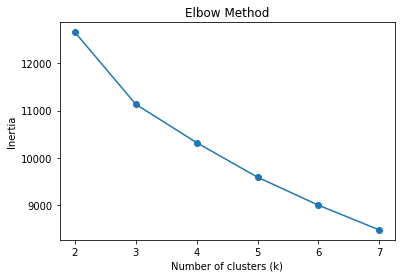

In [14]:
#eelbow 
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

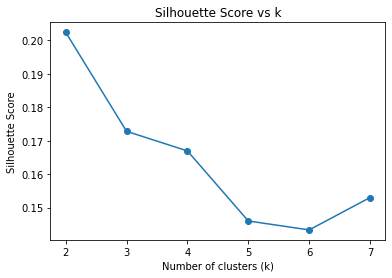

In [15]:
#silhouettte
plt.plot(k_values, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

**Note:** Based on the elbow and silhouette plots, four clusters were selected since additional clusters show little improvement.

In [16]:
#kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)
#number of songs
df["cluster"].value_counts()

1    532
3    505
0    376
2    197
Name: cluster, dtype: int64

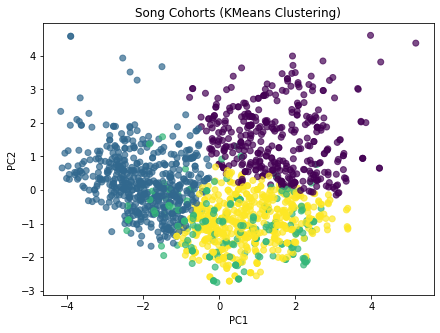

In [17]:
#visualize clusters PCA
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster"], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Song Cohorts (KMeans Clustering)")
plt.show()

**Note:** KMeans clustering grouped the songs into four cohorts based on audio features. The PCA plot shows clear separation between clusters, indicating meaningful groupings.

In [18]:
#cluster feature summary
cluster_summary = (
    df.groupby("cluster")[cluster_features + ["popularity"]]
    .mean()
    .round(3)
)
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min,popularity
cluster,,,,,,,,,,,
0,0.456,0.492,0.559,0.076,0.294,-9.810,0.047,113.273,0.469,4.074,22.213
1,0.194,0.359,0.925,0.111,0.845,-5.316,0.109,137.156,0.439,5.238,17.773
2,0.248,0.507,0.832,0.752,0.420,-6.771,0.055,125.841,0.723,3.365,21.168
3,0.158,0.553,0.811,0.057,0.295,-6.680,0.050,124.047,0.762,3.831,22.756


In [19]:
#show example songs of each cluster
for c in sorted(df["cluster"].unique()):
    print(f"\nCluster {c} example songs:")
    display(df[df["cluster"] == c][["name", "album", "popularity"]].head(5))


Cluster 0 example songs:


,name,album,popularity
11,Thru And Thru - Live,Licked Live In NYC,27
27,Fool To Cry - Live At The El Mocambo 1977,Live At The El Mocambo,29
37,Worried Life Blues - Live At The El Mocambo 1977,Live At The El Mocambo,26
38,Little Red Rooster - Live At The El Mocambo 1977,Live At The El Mocambo,25
45,Worried About You - Live At The El Mocambo 1977,Live At The El Mocambo,25



Cluster 1 example songs:


,name,album,popularity
1,Street Fighting Man - Live,Licked Live In NYC,34
2,Start Me Up - Live,Licked Live In NYC,34
3,If You Can't Rock Me - Live,Licked Live In NYC,32
4,Don’t Stop - Live,Licked Live In NYC,32
5,Monkey Man - Live,Licked Live In NYC,31



Cluster 2 example songs:


,name,album,popularity
0,Concert Intro Music - Live,Licked Live In NYC,33
40,Rip This Joint - Live At The El Mocambo 1977,Live At The El Mocambo,25
66,Under My Thumb - Live at Wembley Stadium 1982,Tattoo You (Super Deluxe),22
67,When The Whip Comes Down - Live at Wembley Sta...,Tattoo You (Super Deluxe),19
68,Let's Spend The Night Together - Live at Wembl...,Tattoo You (Super Deluxe),20



Cluster 3 example songs:


,name,album,popularity
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,32
25,Hand Of Fate - Live At The El Mocambo 1977,Live At The El Mocambo,29
26,Route 66 - Live At The El Mocambo 1977,Live At The El Mocambo,30
28,Crazy Mama - Live At The El Mocambo 1977,Live At The El Mocambo,29
30,Crackin’ Up - Live At The El Mocambo 1977,Live At The El Mocambo,27


**Note:** Each cluster represents a different type of song, including mellow live tracks, high-energy rock songs, and instrumental pieces. These cohorts demonstrate how musical features can be used to support personalized song recommendations.

## Conclusion:
This project examined Spotify audio features to analyze Rolling Stones songs and group similar tracks into cohorts. The data was cleaned and explored to identify popular albums and understand how song features relate to popularity over time. PCA was applied to reduce dimensionality, and KMeans clustering was used to form four distinct song groups. These cohorts show how clustering can be applied to support music recommendation systems.